In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
# load data set
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Overview**

In [3]:
# rename the columns
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure',
              'cholestrol','fasting_blood_sugar','rest_ecg','max_heart_rate',
              'exercise_induced_angina','st_slope','slope','major_vassel','thalassemia','target']

In [4]:
print('No of Rows      :', df.shape[0])
print('No of Attributes:', df.shape[1])
print('\nAttributes Name:\n', df.columns)

No of Rows      : 303
No of Attributes: 14

Attributes Name:
 Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_slope', 'slope', 'major_vassel',
       'thalassemia', 'target'],
      dtype='object')


In [5]:
df['sex'] = df['sex'].replace({1:'male',0:'female'})

df['chest_pain_type'] = df['chest_pain_type'].replace({0:'typical angina',1:'atypical angina',
                                                      2:'non-angianl',3:'asymptomatic'})

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({1:'greater than 120 mg/dl',
                                                             0:'less than 120 mg/dl'})

df['rest_ecg'] = df['rest_ecg'].replace({0:'normal',1:'ST T wave',2:'show probable'})

df['exercise_induced_angina'] = df['exercise_induced_angina'].replace({0:'exercise not induced angina',
                                                                      1: 'exercise induced angina'})

df['slope'] = df['slope'].replace({0:'upslopping',1:'flat',2:'down slopping'})

df['thalassemia'] = df['thalassemia'].replace({0:'unknow',1:'normal',
                                              2:'fixed defect', 3 : 'reversable defect'})

df['target'] = df['target'].replace({0:'no',1:'yes'})

In [6]:
# target column
target_col = ['target']

# categorical columns
cat_cols = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','slope',
          'major_vassel','thalassemia']

# numerical columns
num_cols = [x for x in df.columns if x not in target_col + cat_cols]

# sepration of data
dis = df[df['target'] == 'yes']
not_dis = df[df['target'] == 'no']

Patient's Disease in Data

In [7]:
# label
lab = df['target'].value_counts().keys().tolist()

# val
val = df['target'].value_counts().values.tolist()

trace = go.Pie(labels = lab,
              values = val,
              marker = dict(colors = ['royalblue', 'lime'],
                           line = dict(color = 'white',
                                      width = 1.3)
                           ),
              rotation = 90,
              hoverinfo = 'label+value+text',
              hole = .5
              )

layout = go.Layout(dict(title = 'Patients Disease in Data',
                          plot_bgcolor = 'rgb(243,243,243)',
                          paper_bgcolor = 'rgb(243,243,243)'
                          )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Variable Distribution in Data

In [8]:
# function for pie plot for customer attrition type
def plot_pie(column):
    trace1 = go.Pie(values = dis[column].value_counts().values.tolist(),
                   labels = dis[column].value_counts().keys().tolist(),
                   marker = dict(line = dict(width = 2,
                                            color = 'rgb(243,243,243)',
                                            )
                                ),
                   hoverinfo = 'label+percent+name',
                   domain = dict(x = [0, .48]),
                   name = 'Disease',
                   hole = .5
                   )
    
    trace2 = go.Pie(values = not_dis[column].value_counts().values.tolist(),
                   labels = not_dis[column].value_counts().keys().tolist(),
                   marker = dict(line = dict(width = 2,
                                            color = 'rgb(243,243,243)',
                                            )
                                ),
                   hoverinfo = 'label+percent+name',
                   domain = dict(x = [.52, 1]),
                   name = 'Not Disease',
                   hole = .5
                   )
    
    layout = go.Layout(dict(title = column + 'Distribution in Disease',
                           plot_bgcolor = 'rgb(243,243,243)',
                           paper_bgcolor = 'rgb(243,243,243)',
                           annotations = [dict(text = 'Disease',
                                              font = dict(size = 13),
                                              showarrow = False,
                                              x = .20, y = .5),
                                         dict(text = 'Not Disease',
                                             font = dict(size = 13),
                                             showarrow = False,
                                             x = .82, y = .5
                                             )
                                         ]
                           )
                      )
    
    data = [trace1, trace2]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)

In [9]:
# for all categorical columns plot pie
for i in cat_cols:
    plot_pie(i)

In [10]:
# function for histogram for customer subscription
def histogram(column):
    trace1 = go.Histogram(x = dis[column],
                         histnorm = 'percent',
                         name = 'Customer Subscribe',
                         marker = dict(line = dict(width = .5,
                                                  color = 'black'
                                                  )
                                      ),
                         opacity = .9
                         )
    trace2 = go.Histogram(x = not_dis[column],
                         histnorm = 'percent',
                         name = 'Customer Not Subscribe',
                         marker = dict(line = dict(width = .5,
                                                  color = 'black'
                                                  )
                                      ),
                         opacity = .9
                         )
    layout = go.Layout(dict(title = column + 'Distribution in Customer Subscription',
                           plot_bgcolor = 'rgb(243,243,243)',
                           paper_bgcolor = 'rgb(243,243,243)',
                           xaxis = dict(gridcolor = 'rgb(255,255,255)',
                                       title = column,
                                       zerolinewidth = 1,
                                       ticklen = 5,
                                       gridwidth = 2
                                       ),
                           yaxis = dict(gridcolor = 'rgb(255,255,255)',
                                       title = 'percent',
                                       zerolinewidth = 1,
                                       ticklen = 5,
                                       gridwidth = 2
                                       )
                           )
                      )
    data = [trace1, trace2]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)

In [11]:
# for all numerical columns plot histogram
for i in num_cols:
    histogram(i)

In [12]:
num_cols

['age', 'resting_blood_pressure', 'cholestrol', 'max_heart_rate', 'st_slope']

In [13]:
# function for scatter plot matrix for numerical columns in data
def scatter_matrix(data):
    data = data.sort_values(by = 'target', ascending = True)
    classes = data['target'].unique().tolist()
    classes
    
    classes_code = {classes[k]: k for k in range(2)}
    classes_code
    
    color_vals = [classes_code[cl] for cl in data['target']]
    color_vals
    
    pl_colorscale = 'Portland'
    
    pl_colorscale
    
    text = [data.loc[k, 'target'] for k in range(len(data))]
    text
    
    trace = go.Splom(dimensions = [dict(label='age',
                                       values = data['age']),
                                  dict(label='resting_blood_pressure',
                                      values = data['resting_blood_pressure']),
                                  dict(label='cholestrol',
                                      values= data['cholestrol']),
                                  dict(label='max_heart_rate',
                                      values = data['max_heart_rate']),
                                  dict(label='st_slope',
                                      values = data['st_slope'])],
                    text = text,
                    marker = dict(color = color_vals,
                                 colorscale = pl_colorscale,
                                 showscale = False
                                 )
                    )
    layout = go.Layout(dict(title =
                           'Scatter plot for Numerical Variables',
                           autosize=False,
                           height = 900,
                           width = 900,
                           )
                      )
    data = [trace]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [14]:
scatter_matrix(df)

Data Preprocessing

In [15]:
# target columns
target_col = ['target']

# categorical variables
cat_cols = ['sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','slope',
          'major_vassel','thalassemia']

# numerical vaiables
num_cols = [x for x in df.columns if x not in target_col + cat_cols]

# binary column with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

# column more than 2 values
multi_cols = [x for x in cat_cols if x not in bin_cols]

In [16]:
# label encoding binary column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bin_cols:
    df[i] = le.fit_transform(df[i])

In [17]:
# duplicating columns for multi value column
df = pd.get_dummies(data = df, columns = multi_cols)

In [18]:
# scalling numerical columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)

In [19]:
# dropping original values, merging scaled values for numerical columns
df_og = df.copy()
df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index=True, right_index=True, how = 'left')

Variable Summary

In [20]:
summary = (df.describe().transpose().reset_index())

summary = summary.rename(columns = {'index':'feature'})
summary = np.round(summary, 3)

val_list = [summary['feature'], summary['count'],
           summary['mean'], summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace = go.Table(header = dict(values = summary.columns.tolist(),
                              line = dict(color = ['#506784']),
                              fill = dict(color = ['#119DFF']),
                              ),
                cells = dict(values = val_list,
                            line = dict(color = ['#506784']),
                            fill = dict(color = ['lightgrey', '#F5F8FF'])
                            ),
                columnwidth = [300, 60,100,100,60,60,80,80,80])

layout = go.Layout(dict(title = 'Variable Summary'))

fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig)

Correlation Matrix

In [21]:
# correlation
correlation = df.corr()

# tick labels
matrix_cols = correlation.columns.tolist()

# convert to array
corr_array = np.array(correlation)

# plotting
trace = go.Heatmap(z = corr_array,
                  x = matrix_cols,
                  y = matrix_cols,
                  colorscale = 'Viridis',
                  colorbar = dict(title = 'Person Correlation Cofficient',
                                 titleside = 'right'
                                 )
                  )

layout = go.Layout(dict(title = 'Correlation Matrix for Attributes',
                       autosize = False,
                       height = 900,
                       width = 950,
                       margin = dict(r = 0, l = 210,
                                    t = 25, b = 210,
                                    ),
                       yaxis = dict(tickfont = dict(size = 9)),
                       xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Model Building

In [22]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold

Logistic Regression 

In [23]:
# splitting train & test data
train, test = train_test_split(df, test_size = .25, random_state = 111)

# seprating dependent & independent variable
cols = [i for i in df.columns if i not in target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X = test[cols]
test_Y = test[target_col]

def patient_disease_prediction(algorithm, training_x, testing_x,
                               training_y, testing_y, cols, cf, threshold_plot):
    # model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    # coeff
    if cf == 'coefficients':
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == 'features':
        coefficients = pd.DataFrame(algorithm.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients, column_df, left_index = True,
                          right_index = True, how = 'left'))
    coef_sumry.columns = ['coefficients','features']
    coef_sumry = coef_sumry.sort_values(by = 'coefficients', ascending = False)
    
    print(algorithm)
    print('\nClassification Report:\n', classification_report(testing_y, predictions))
    print('\nAccuracy Score:', accuracy_score(testing_y, predictions))
    
    # confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    
    # roc auc score
    model_roc_auc = roc_auc_score(testing_y, predictions)
    
    print('Area Under Curve:', model_roc_auc,'\n')
    fpr, tpr, threshold = roc_curve(testing_y, predictions)
    
    # plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                       x = ['Not Disease', 'Disease'],
                       y = ['Not Disease', 'Disease'],
                       showscale = False, colorscale = 'Picnic',
                       name = 'Matrix')
    
    # plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                       name = 'ROC :' + str(model_roc_auc),
                       line = dict(color = ('rgb(22,96,167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                       line = dict(color = 'rgb(205,12,24)', width = 2, dash = 'dot'))
    # plot coeff
    trace4 = go.Bar(x = coef_sumry['features'], y = coef_sumry['coefficients'],
                   name = 'coefficients',
                   marker = dict(color = coef_sumry['coefficients'],
                                colorscale = 'Picnic',
                                line = dict(width = .6, color = 'black')))
    
    # subplots
    fig = tls.make_subplots(rows = 2, cols = 2, specs = [[{},{}], [{'colspan':2},None]],
                           subplot_titles = ('Confusion Matrix',
                                            'Receiver Operating Characterstic',
                                            'Feature Importance'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title = 'Model Performance',
                        autosize = False, height = 900, width = 800,
                        plot_bgcolor = 'rgba(240,240,240,0.95)',
                        paper_bgcolor = 'rgba(240,240,240,0.95)',
                        margin = dict(b = 195))
    fig['layout']['xaxis2'].update(dict(title = 'False Positive Rate'))
    fig['layout']['yaxis2'].update(dict(title = 'True Positive Rate'))
    fig['layout']['xaxis3'].update(dict(showgrid=True, tickfont = dict(size = 10),
                                       tickangle=90))
    py.iplot(fig)
    
    if threshold_plot == True:
        visulizer = DiscriminationThreshold(algorithm)
        visulizer.fit(training_x, training_y)
        visulizer.poof()

In [24]:
logit = LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.83      0.91      0.87        47

    accuracy                           0.83        76
   macro avg       0.83      0.80      0.81        76
weighted avg       0.83      0.83      0.83        76


Accuracy Score: 0.8289473684210527
Area Under Curve: 0.8022743947175348 



/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



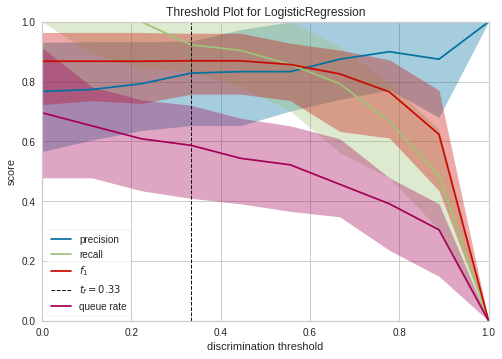

In [25]:
patient_disease_prediction(logit, train_X, test_X, train_Y, test_Y,
                                cols, 'coefficients', threshold_plot=True)

In [26]:
from imblearn.over_sampling import SMOTE

cols = [i for i in df.columns if i not in target_col]

smote_X = df[cols]
smote_Y = df[target_col]

# split train & test data
smote_train_X, smote_test_X, smote_train_Y, smote_test_Y = train_test_split(smote_X, smote_Y,
                                                                           test_size = .25, random_state = 111)

# oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X, os_smote_Y = os.fit_sample(smote_train_X, smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X, columns = cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y, columns = target_col)

Using TensorFlow backend.


In [27]:
logit_smote = LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.83      0.91      0.87        47

    accuracy                           0.83        76
   macro avg       0.83      0.80      0.81        76
weighted avg       0.83      0.83      0.83        76


Accuracy Score: 0.8289473684210527
Area Under Curve: 0.8022743947175348 



/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



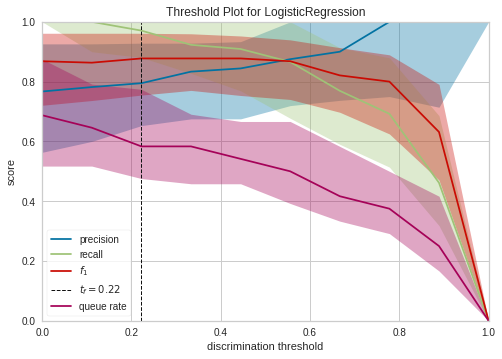

In [28]:
patient_disease_prediction(logit_smote, os_smote_X, test_X, os_smote_Y, test_Y,
                           cols, 'coefficients', threshold_plot=True)

Receiver Feature Elimination

In [29]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit, 10)
rfe = rfe.fit(os_smote_X, os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

# identified columns recrusive feature elimation
idc_rfe = pd.DataFrame({'rfe_support':rfe.support_,
                       'columns':[i for i in df.columns if i not in target_col],
                       'ranking':rfe.ranking_,
                       })

cols = idc_rfe[idc_rfe['rfe_support'] == True]['columns'].tolist()

# seprating train & test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X = test[cols]
test_rf_Y = test[target_col]

logit_rfe = LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        29
           1       0.84      0.89      0.87        47

    accuracy                           0.83        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.83      0.83      0.83        76


Accuracy Score: 0.8289473684210527
Area Under Curve: 0.8088774761555392 



/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



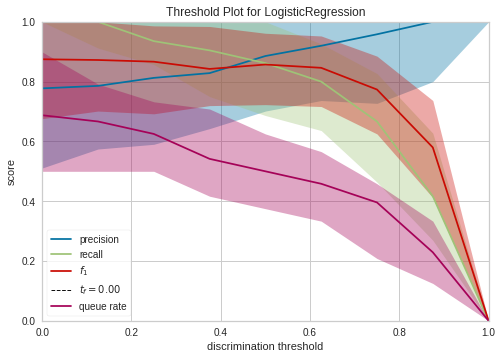

In [30]:
patient_disease_prediction(logit_rfe, train_rf_X, test_rf_X, train_rf_Y, test_rf_Y,
                           cols, 'coefficients', threshold_plot=True)
tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

Univariate Selection

In [31]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in df.columns if i not in target_col]

#dataframe with non negative values
df_x = df_og[cols]
df_y = df_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit = select.fit(df_x,df_y)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)


#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

scores
[7.57683451e+00 3.53954101e-02 1.88849182e+01 2.11721945e+00
 1.52955020e+01 2.16703285e+01 4.26033777e+01 4.64139796e+00
 3.98238552e+00 1.39930830e+00 2.50014168e+01 2.13664625e+01
 1.13901750e+00 2.77470920e+01 1.28556765e+01 1.98948305e+01
 1.25535375e+01 1.31549407e+00 3.80970522e+01 3.23794466e+00
 4.39527347e+01 1.60079051e-02 2.32866240e+01 1.48239245e+01
 2.39363945e+01 1.88320472e+02 7.26442530e+01]
P - Values
[5.91231763e-03 8.50769508e-01 1.38846055e-05 1.45650763e-01
 9.19351634e-05 3.23760630e-06 6.70435150e-11 3.12095694e-02
 4.59784031e-02 2.36839418e-01 5.72882022e-07 3.79349290e-06
 2.85860030e-01 1.38255866e-07 3.36457051e-04 8.18212757e-06
 3.95456963e-04 2.51402328e-01 6.73117466e-10 7.19508484e-02
 3.36402001e-11 8.99318458e-01 1.39567266e-06 1.18028642e-04
 9.95714828e-07 7.39510166e-43 1.55258340e-17]


Decision Tree Visualization

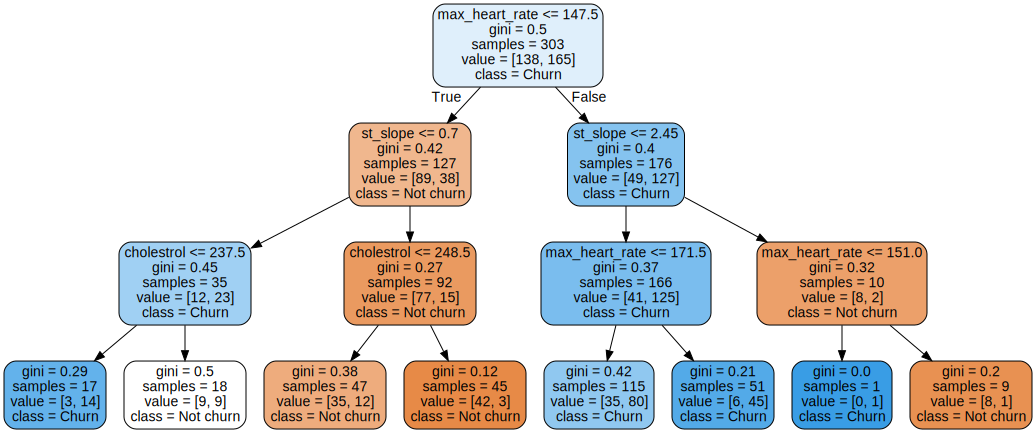

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display

# top 3 categorical features
features_cat = score[score['feature_type'] == 'Categorical']['features'][:3].tolist()

# top 3 numerical features
features_num = score[score['feature_type'] == 'Numerical']['features'][:3].tolist()

# function attributes
# columns = selected columns
# maximum_depth = depth of tree
# criterion_type = ['gini' or 'entropy']
# split_type = ['best' or 'random']
# model performance = True (gives model output)

def plot_decision_tree(columns, maximum_depth, criterion_type, split_type, model_performance = None):
    
    # sepreting dependent & independent variable
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    # model 
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                          splitter = split_type,
                                          criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x, dtc_y)
    
    # plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier, out_file=None,
                                       rounded=True, proportion=False,
                                       feature_names = columns,
                                       precision=2,
                                       class_names = ['Not churn', 'Churn'],
                                       filled = True
                                       )
                  )
    
    # model performance
    if model_performance == True:
        patient_disease_prediction(dt_classifier,
                                   dtc_x, test_X[columns],
                                   dtc_y, test_Y,
                                   columns, 'features', threshold_plot=True)
        
    display(graph)
    
plot_decision_tree(features_num,3,'gini','best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.31      0.47        29
           1       0.70      1.00      0.82        47

    accuracy                           0.74        76
   macro avg       0.85      0.66      0.65        76
weighted avg       0.82      0.74      0.69        76


Accuracy Score: 0.7368421052631579
Area Under Curve: 0.6551724137931034 



/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



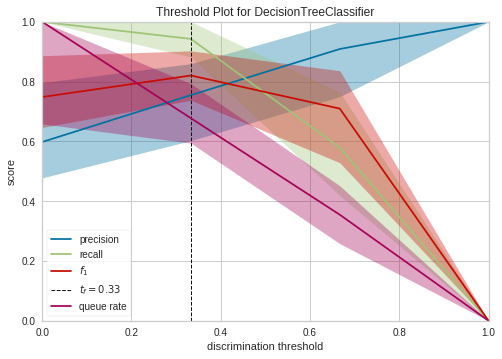

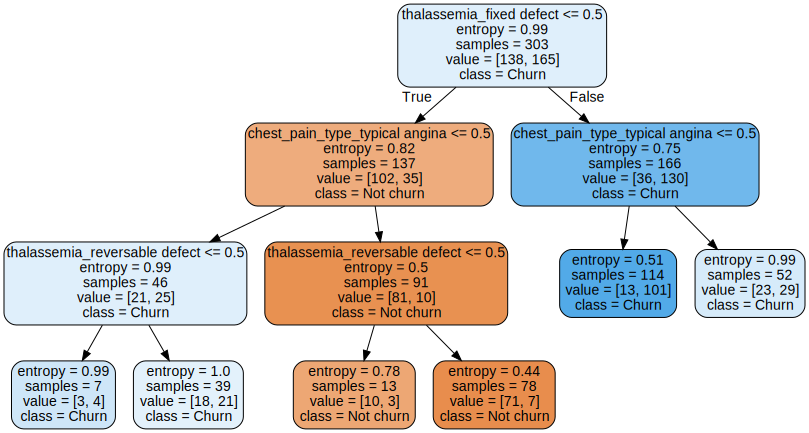

In [33]:
plot_decision_tree(features_cat, 3, 'entropy', 'best', model_performance = True)

KNN Classifer

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72        29
           1       0.81      0.89      0.85        47

    accuracy                           0.80        76
   macro avg       0.80      0.77      0.78        76
weighted avg       0.80      0.80      0.80        76

Accuracy Scor: 0.8026315789473685
Area under curve: 0.7743947175348496


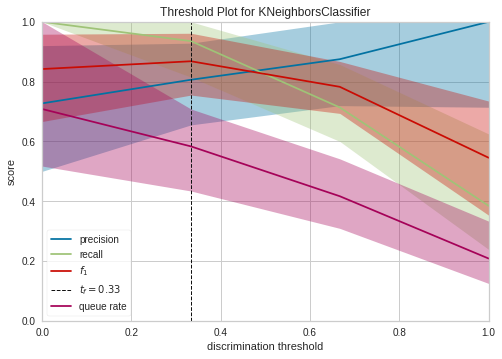

In [34]:
def patient_disease_prediction_alg(algorithm, training_x, testing_x,
                                   training_y, testing_y, threshold_plot = True):
    
    # model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print(algorithm)
    print('\n Classification Report:\n', classification_report(testing_y, predictions))
    print('Accuracy Scor:', accuracy_score(testing_y, predictions))
    # confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    # roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions)
    print('Area under curve:', model_roc_auc)
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    
    # plot roc curve
    trace1 = go.Scatter(x = fpr, y = tpr,
                       name = 'Roc :' + str(model_roc_auc),
                       line = dict(color = ('rgb(22,96,167)'), width = 2),
                       )
    trace2 = go.Scatter(x = [0,1], y = [0,1],
                       line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                                  dash = 'dot'))
    
    # plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix, x = ['Not Disease', 'Disease'],
                       y = ['Not Disease', 'Disease'],
                       showscale = False, colorscale ='Blues', name= 'matrix',
                       xaxis = 'x2', yaxis = 'y2'
                       )
    
    layout = go.Layout(dict(title = 'Model Performance',
                           autosize = False, height = 500, width = 800,
                           showlegend = False,
                           plot_bgcolor = 'rgb(243,243,243)',
                           paper_bgcolor = 'rgb(243,243,243)',
                           xaxis = dict(title = 'False Positive Rate',
                                       gridcolor = 'rgb(255,255,255)',
                                       domain = [0, 0.6],
                                       ticklen = 5, gridwidth = 2),
                           yaxis = dict(title = 'True Positive Rate',
                                       gridcolor = 'rgb(255,255,255)',
                                       zerolinewidth = 1,
                                       ticklen = 5, gridwidth = 2),
                           margin = dict(b = 200),
                           xaxis2 = dict(domain = [0.7, 1], tickangle = 90,
                                        gridcolor = 'rgb(255,255,255)'),
                           yaxis2 = dict(anchor = 'x2', gridcolor = 'rgb(255,255,255)')
                           )
                      )
    
    data = [trace1, trace2, trace3]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)
    
    if threshold_plot == True:
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x, training_y)
        visualizer.poof()
        
        
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
                          metric_params=None, n_jobs = 1, n_neighbors = 5, p = 2,
                          weights = 'uniform')
patient_disease_prediction_alg(knn, os_smote_X, test_X,
                               os_smote_Y, test_Y, threshold_plot = True)

Visualize Decision Tree with Random Forest Classifer

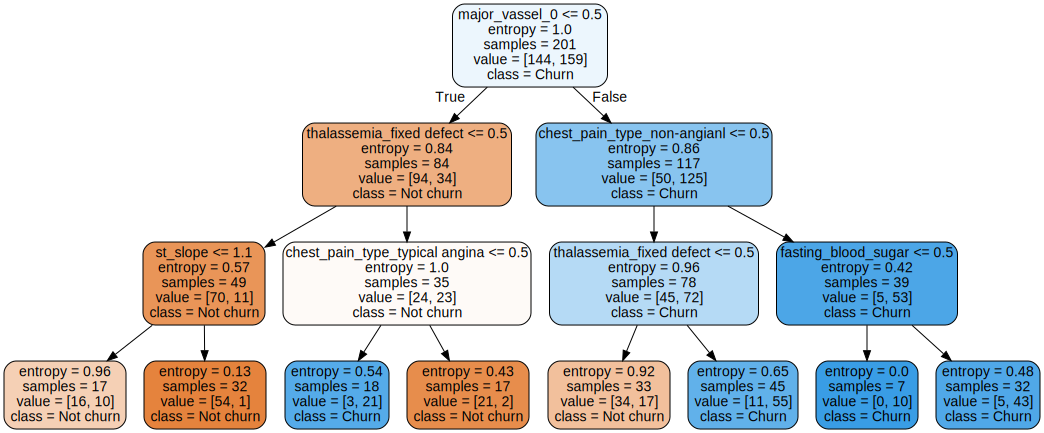

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.62      0.73        29
           1       0.80      0.96      0.87        47

    accuracy                           0.83        76
   macro avg       0.85      0.79      0.80        76
weighted avg       0.84      0.83      0.82        76


Accuracy Score: 0.8289473684210527
Area Under Curve: 0.7890682318415261 



/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



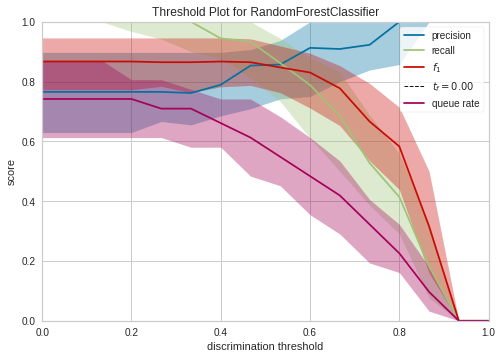

In [35]:
from sklearn.ensemble import RandomForestClassifier

# function attributes
# columns - column used
# nf_estimators = The number of trees in the forest
# estimated_tree = The number to be displayed
# maximum_depth = depth of tree
# criterion_type = split criterion type ['gini' or 'entropy']
# model performance = prints performance of model

def plot_tree_randomforest(columns, nf_estimators,
                          estimated_tree, maximum_depth,
                          criterion_type, model_performance = None):
    dataframe = df_og[columns + target_col].copy()
    
    # train and test dataset
    rf_x = dataframe[[i for i in columns if i not in target_col]]
    rf_y = dataframe[target_col]
    
    # random forest classifier
    rfc = RandomForestClassifier(n_estimators = nf_estimators,
                                max_depth = maximum_depth,
                                criterion = criterion_type,
                                )
    rfc.fit(rf_x, rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree, out_file = None,
                                       rounded = True, proportion = False,
                                       feature_names = columns,
                                       precision =2,
                                       class_names = ['Not churn', 'Churn'],
                                       filled = True))
    
    display(graph)
    
    # model performance
    if model_performance == True:
        patient_disease_prediction(rfc, rf_x, test_X[columns],
                                   rf_y, test_Y,
                                   columns, 'features', threshold_plot = True)
        
cols1 = [i for i in train_X.columns if i not in target_col]
plot_tree_randomforest(cols1, 100, 99, 3, 'entropy', True)

Random Forest Classifer

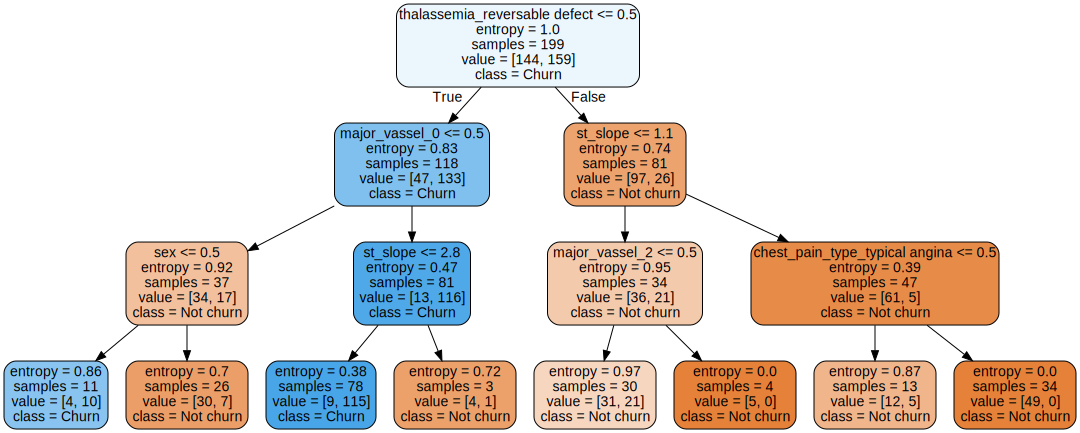

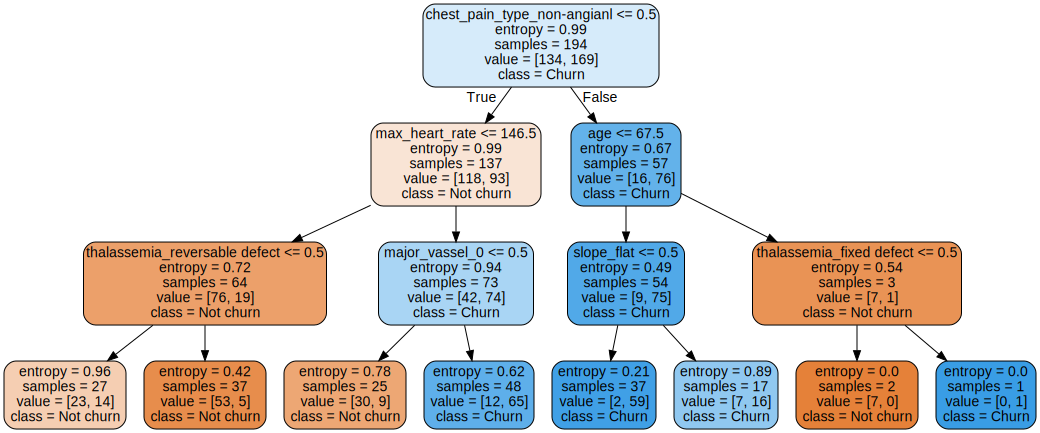

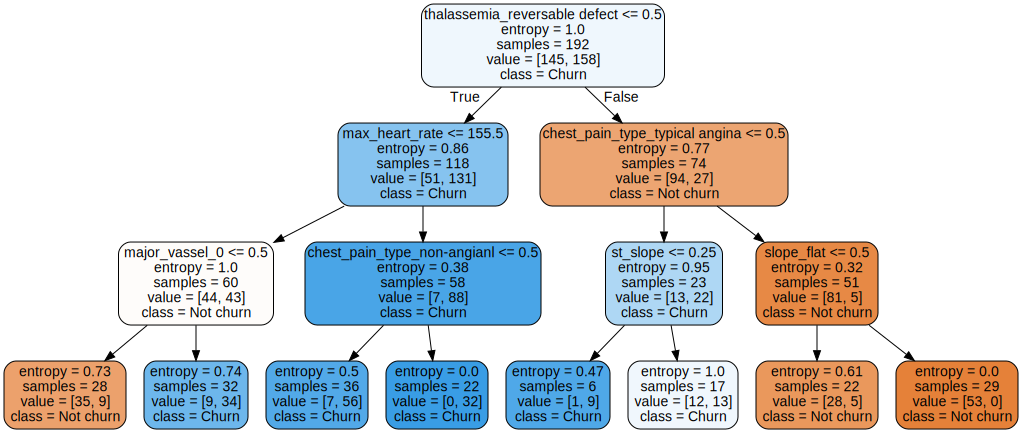

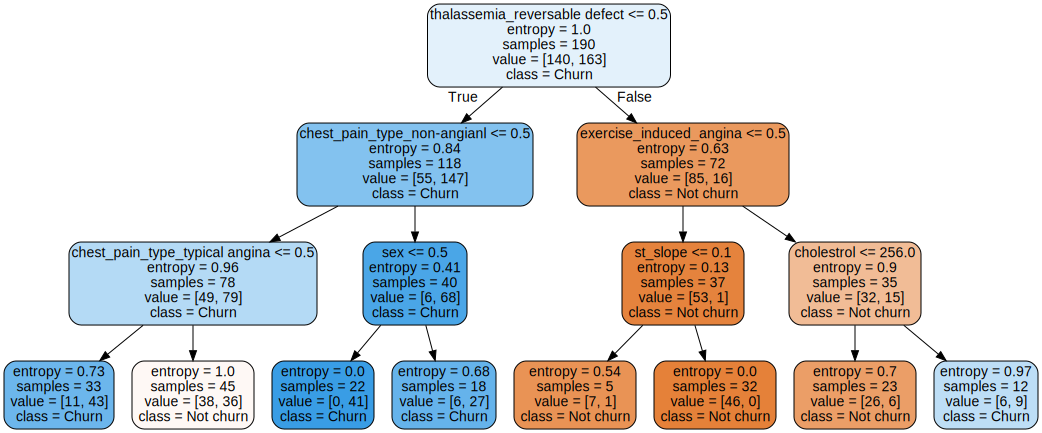

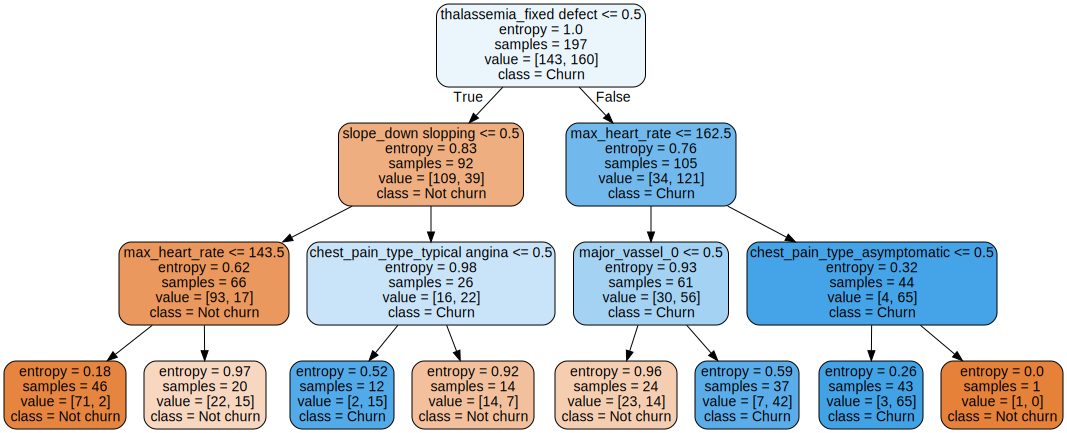

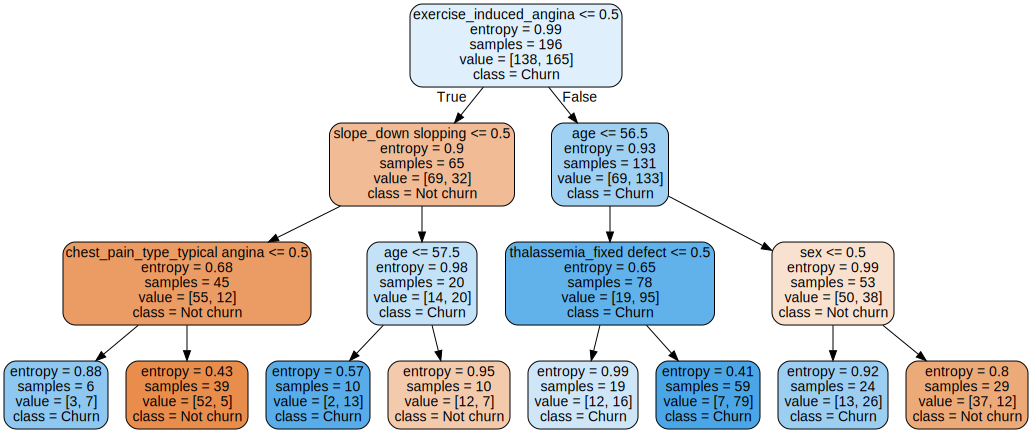

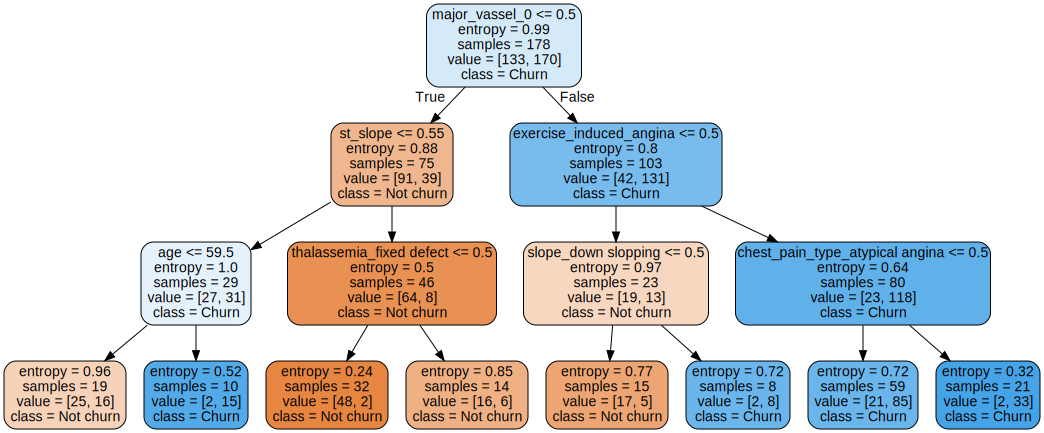

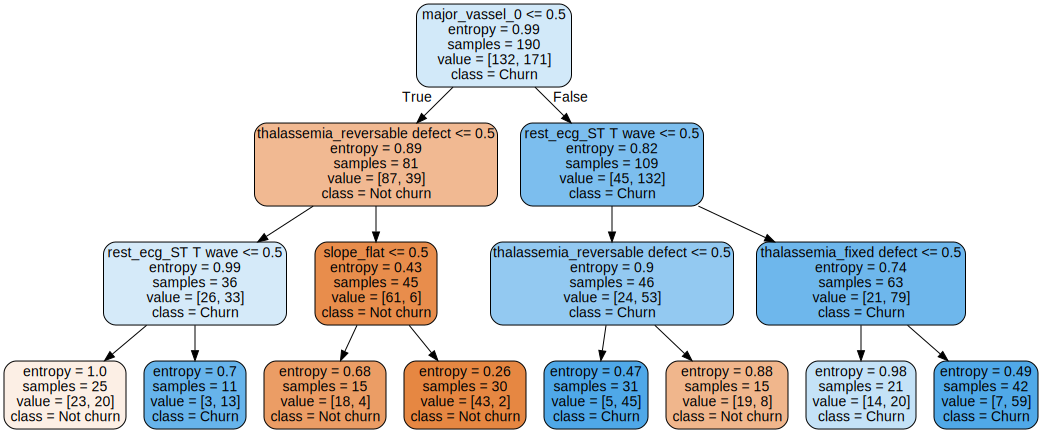

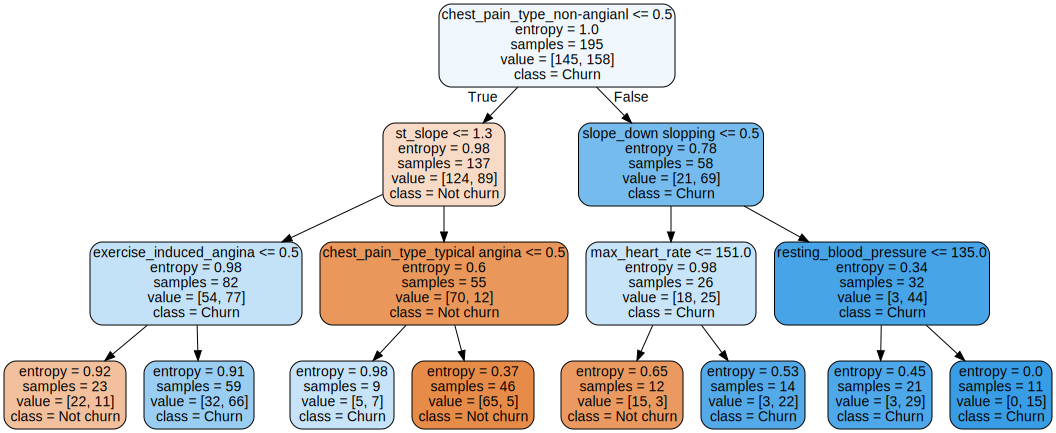

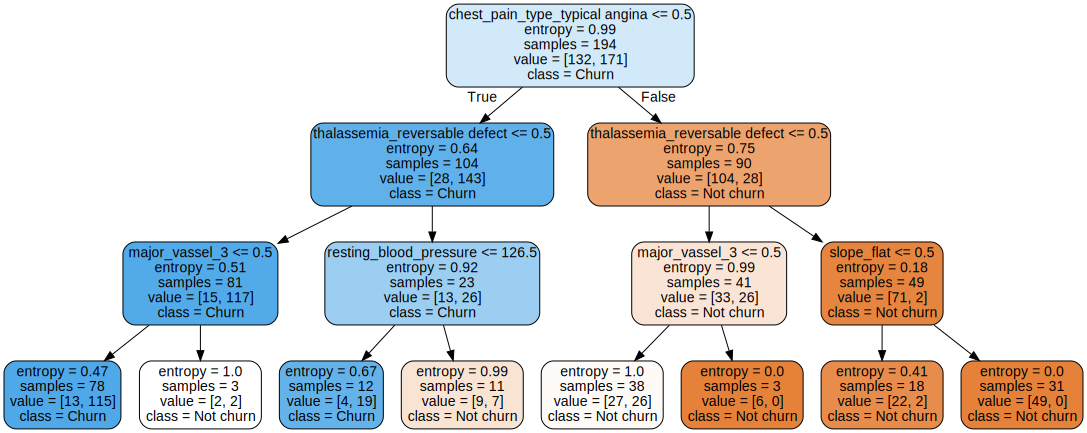

In [36]:
# making 10 trees with random forest 
n = np.arange(0,10).tolist()
cols1 = [i for i in train_X.columns if i not in target_col]
for i in n:
    plot_tree_randomforest(cols1, 10, i, 3, 'entropy',False)

Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.93      0.61        29
           1       0.88      0.30      0.44        47

    accuracy                           0.54        76
   macro avg       0.66      0.61      0.53        76
weighted avg       0.71      0.54      0.51        76

Accuracy Scor: 0.5394736842105263
Area under curve: 0.6144534115920762


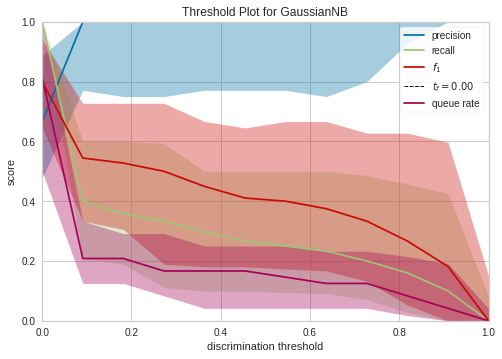

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors = None)

patient_disease_prediction_alg(gnb, os_smote_X, test_X, os_smote_Y, test_Y)

LightGBM Classifier

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69        29
           1       0.79      0.89      0.84        47

    accuracy                           0.79        76
   macro avg       0.79      0.76      0.77        76
weighted avg       0.79      0.79      0.78        76


Accuracy Score: 0.7894736842105263
Area Under Curve: 0.7571533382245047 



/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



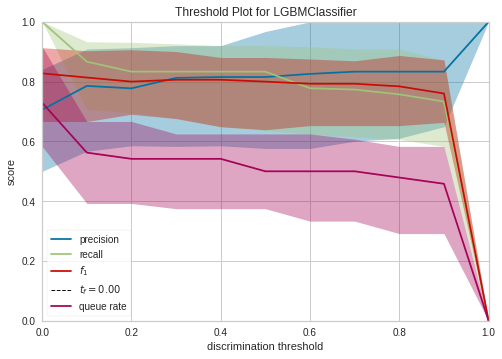

In [38]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type = 'gbdt', class_weight=None, colsample_bytree =1.0,
                       learning_rate=0.5, max_depth=7, min_child_samples=20,
                       min_child_weight=0.001, min_split_gain = 0.0, n_estimators =100,
                       n_jobs = -1, num_leaves=500, objective='binary', random_state=None,
                       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                       subsample_for_bin=200000, subsample_freq= 0)

cols = [i for i in df.columns if i not in target_col]
patient_disease_prediction(lgbm_c, os_smote_X, test_X, os_smote_Y, test_Y,
                           cols, 'features', threshold_plot=True)

XGBoost Classifer

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.59      0.65        29
           1       0.77      0.87      0.82        47

    accuracy                           0.76        76
   macro avg       0.76      0.73      0.74        76
weighted avg       0.76      0.76      0.76        76


Accuracy Score: 0.7631578947368421
Area Under Curve: 0.7292736610418196 



/opt/conda/lib/python3.6/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



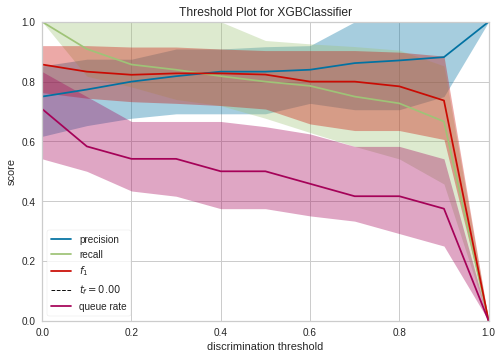

In [39]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


patient_disease_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                           cols,"features",threshold_plot = True)

Model Performance Matrix

In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Reg(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Reg(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Reg(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                      "LGBM Classifier")
model9 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

Compare Model Performance

In [41]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )
trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)